In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skrf as rf
from skrf import Network
from skrf import plotting
import math

<hr>
Modified   By   Reason <br>
17-Jan-22  CBL  Original - Curious about matching stubs <br>
Online docs: <br>
<ul>
<li> https://scikit-rf.readthedocs.io/en/latest/tutorials/Plotting.html </li>
<li> github associated with this: https://github.com/scikit-rf/ </li>
<li> https://scikit-rf.readthedocs.io/en/latest/examples/networktheory/Transmission%20Line%20Properties%20and%20Manipulations.html </li>
<li> https://scikit-rf.readthedocs.io/en/latest/examples/networktheory/Transmission%20Lines%20and%20SWR.html
</ul>
<img src="Impedance_matching_4.svg" />
<hr>

In [2]:
# skrf figure styling
rf.stylely()

<H1> Lossless Lines </H1>
Let’s start with a lossless line of propagation constant $\gamma = j\beta $ 
and characteristic impedance of $z_0=50\Omega$

In [3]:
freq = rf.Frequency(10, unit='MHz', npoints=1)

In [4]:
# load and line properties
Z_L = 300  # Ohm was originally 75, changed to folded dipole
Z_0 = 75  # Ohm, was originally 50, small length turning it into a balun
L   = 50  # m
VF  = 0.67

# propagation constant
beta = freq.w/rf.c
gamma = 1j*beta

Below we calculate the SWR of the line as a function of $z$ the line length measured from the load ($z=0$ at the load, $z=L$ at the source).

In [ ]:
z = np.linspace(start=L, stop=0, num=301)
SWRs = rf.zl_2_swr(z0=Z_0, zl=rf.zl_2_zin(Z_0, Z_L, gamma*z))

In [ ]:
fig, ax = plt.subplots()
ax.plot(z, SWRs, lw=2)
ax.set_xlabel('z [m]')
ax.set_ylabel('SWR')
ax.set_title('SWR along the (lossless) line')
ax.invert_xaxis()
ax.axvline(0, lw=8, color='k')
ax.axvline(L, lw=8, color='k')
ax.annotate('Load', xy=(0, 1.55), xytext=(10, 1.575),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('Source', xy=(50, 1.55), xytext=(40, 1.575),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

As expected, the SWR is the same everywhere along the line as the forward and backward wave amplitudes are also the same along the line.

<H1> Lossy Lines </H1>
Let’s take the previous example but this time on a lossy line. The line is defined with a propagation constant $\gamma = \alpha + j \beta $ :

In [15]:
alpha = 0.01  # Np/m. Here a dummy value, just for the sake of the example
gamma = alpha + 1j*beta

In [16]:
z = np.linspace(0, L, num=101)
SWRs = rf.zl_2_swr(z0=Z_0, zl=rf.zl_2_zin(Z_0, Z_L, gamma*z))

Text(40, 1.5, 'Source')

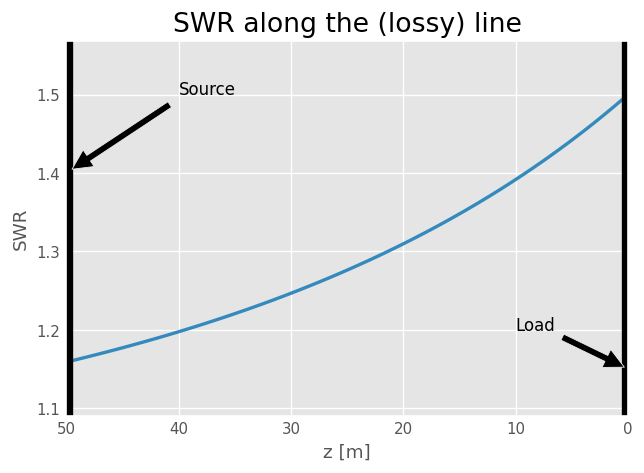

In [17]:
fig, ax = plt.subplots()
ax.plot(z, SWRs, lw=2)
ax.set_xlabel('z [m]')
ax.set_ylabel('SWR')
ax.set_title('SWR along the (lossy) line')
ax.invert_xaxis()
ax.axvline(0, lw=8, color='k')
ax.axvline(L, lw=8, color='k')
ax.annotate('Load', xy=(0, 1.15), xytext=(10, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('Source', xy=(50, 1.4), xytext=(40, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

For a lossy line, the SWR is maximum at the load and decreases to be minimum at the source side.

Let’s see how the impedance varies along the line:

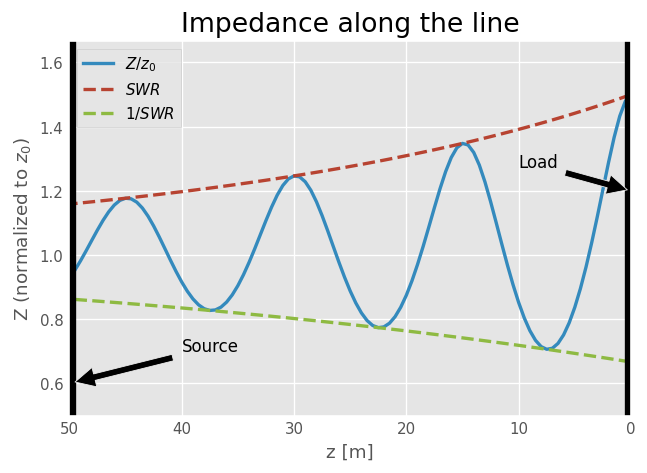

In [18]:
Zins = rf.zl_2_zin(Z_0, Z_L, gamma*z)

fig, ax = plt.subplots()
ax.plot(z, np.abs(Zins/Z_0), lw=2, label='$Z/z_0$')
ax.plot(z, SWRs, lw=2, ls='--', label=r'$SWR$')
ax.plot(z, 1/SWRs, lw=2, ls='--', label=r'$1/SWR$')

ax.set_xlabel('z [m]')
ax.set_ylabel('Z (normalized to $z_0$)')
ax.set_title('Impedance along the line')
ax.invert_xaxis()
ax.axvline(0, lw=8, color='k')
ax.axvline(L, lw=8, color='k')
ax.annotate('Load', xy=(0, 1.2), xytext=(10, 1.275),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('Source', xy=(50, 0.6), xytext=(40, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.legend()

CBL Note: This shows that you can match one load to another using a line length. 

In [19]:
lambd = rf.c/freq.f * VF
print('VF=',VF, ' and Wavelength: ', lambd, 'm, lambda/4:', lambd/4, 'm')

VF= 0.67  and Wavelength:  [20.08609469] m, lambda/4: [5.02152367] m


Looking at the plot above, we see that 5m on the $50\Omega$ line that we get a SWR of 1. 

The previous result is due to the fact that voltages and currents vary along the transmission line:

In [20]:
V_s = 1
Z_in = rf.zl_2_zin(Z_0, Z_L, gamma*z)
# Z_s = Z_0
V_in = V_s * Z_in/(Z_0 + Z_in)
I_in = V_in/(Z_0 + Z_in)
# note that here we are going from source to load
V, I = rf.voltage_current_propagation(V_in, I_in, Z_0, gamma*z)

Text(10, 0.001, 'Source')

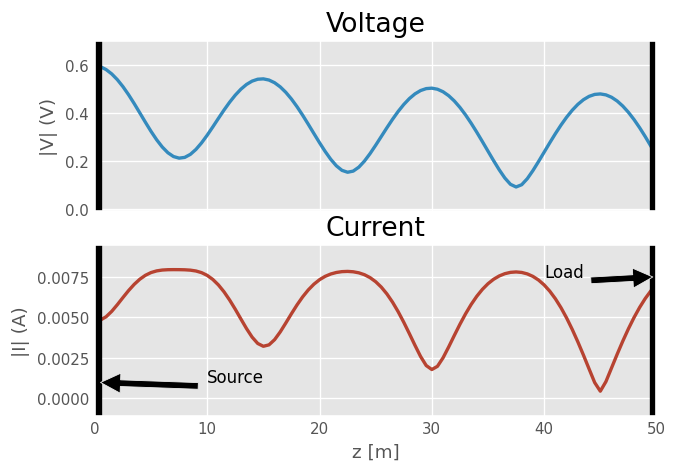

In [21]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(z, np.abs(V), lw=2)
ax[1].plot(z, np.abs(I), lw=2, color='C1')
ax[1].set_xlabel('z [m]')
ax[0].set_ylabel('|V| (V)')
ax[1].set_ylabel('|I| (A)')
ax[0].set_title('Voltage')
ax[1].set_title('Current')
[a.axvline(0, lw=8, color='k') for a in ax]
[a.axvline(L, lw=8, color='k') for a in ax]
ax[1].annotate('Load', xy=(50, 0.0075), xytext=(40, 0.0075),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax[1].annotate('Source', xy=(0, 0.001), xytext=(10, 0.001),
            arrowprops=dict(facecolor='black', shrink=0.05))